In [ ]:
# Long Short Term Memory(LSTM)

In [6]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [17]:
df  = web.DataReader('AAPL', data_source='yahoo', start = '2012-01-01', end = '2019-12-17')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.650659
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.718646
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.859850
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.994284
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.973674
...,...,...,...,...,...,...
2019-12-11,67.775002,67.125000,67.202499,67.692497,78756800.0,67.012764
2019-12-12,68.139999,66.830002,66.945000,67.864998,137310400.0,67.183548
2019-12-13,68.824997,67.732498,67.864998,68.787498,133587600.0,68.096771


In [18]:
df.shape

(2003, 6)

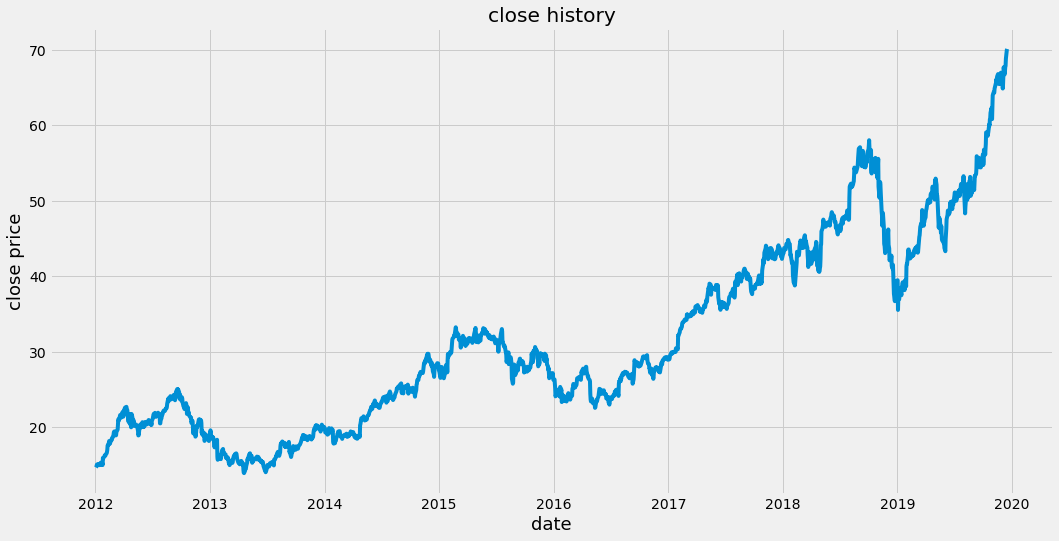

In [19]:
# visualize closing price history
plt.figure(figsize=(16,8))
plt.title('close history')
plt.plot(df['Close'])
plt.xlabel('date', fontsize=18)
plt.ylabel('close price', fontsize=18)
plt.show()

In [26]:
# make training data

data = df.filter(['Close'])

dataset = data.values

training_data_len = math.ceil(len(dataset) * 0.8)

training_data_len

1603

In [25]:
# scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaler_data = scaler.fit_transform(dataset) 

scaler_data

array([[0.01316509],
       [0.01457063],
       [0.01748985],
       ...,
       [0.97658263],
       [0.99755134],
       [1.        ]])

In [32]:
# create the training dataset
# 小目标是，用连续的60个close去预测第61个close的价格 
train_data = scaler_data[0:training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<= 60:
        print(x_train)
        print(y_train)
        print()

[array([0.01316509, 0.01457063, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862191, 0.02173194,
       0.02453668, 0.02367172, 0.01893355, 0.02345548, 0.01900352,
       0.03569838, 0.03440732, 0.0360927 , 0.03973694, 0.04194384,
       0.0417594 , 0.0410789 , 0.04397903, 0.04670744, 0.04979839,
       0.05479095, 0.0652785 , 0.06543749, 0.07127594, 0.07563885,
       0.06814049, 0.07102789, 0.07097066, 0.07906688, 0.07791571,
       0.08004628, 0.08387497, 0.08600558, 0.09214292, 0.09661394,
       0.09790501, 0.09835659, 0.09071194, 0.08886753, 0.08914103,
       0.09632778, 0.09835024, 0.10269409, 0.11293358, 0.12659476,
       0.12403805, 0.1240444 , 0.13392141, 0.13701237, 0.13481179,
       0.13280207, 0.13070964, 0.13766105, 0.14243103, 0.14442805])]
[0.13949272033425864]



In [33]:
# 为了让i的顺序看的更清楚一点
# train_data = scaler_data[0:training_data_len, :]

# x_train = []
# y_train = []

# for i in range(60, len(train_data)):
#     x_train.append(train_data[i-60:i,0])
#     y_train.append(train_data[i,0])
#     if i<= 61:
#         print(x_train)
#         print(y_train)
#         print() # 第二个array的第一项，是第一个array的第二项。这就是60，61的顺序差别

In [34]:
# conver the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(x_train)

In [36]:
# reshape the data (LSTM model needs data to be 3 dimentional)
# x_train = np.reshape(x_train, (1543, 60, 1))
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) # 这样是为了让code更加robust
x_train.shape

(1543, 60, 1)

In [35]:
x_train.shape

(1543, 60)

In [37]:
#build LSTM model , 四个add的过程也是 build architecture的过程
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1],1))) # add the first LSTM layer with 50 neurals,
# return_sequences=True是为了马上要再加一层layer， 也因为是第一层layer，需要给一个layer shape，即input_shape=(60,1)

model.add(LSTM(50, return_sequences=False)) # False意味着这是最后一层LSTM layer

model.add(Dense(25))

model.add(Dense(1 ))


In [38]:
# compile the model
model.compile(optimizer='adam', loss='mean_squared_error') # optimizer是建立在loss的基础上，loss用于衡量training model的效果


In [39]:
# train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)# batch size is the total number of training examples present in a single batch
# epochs is the number of iterations when an entire dataset is passed forward and backward through a neural network


1543/1543 [==============================] - 27s 16ms/step - loss: 0.0018


In [40]:
# training model 大约花了近1分钟的时间。和很多model相比，耗时还是比较长的，鉴于data极小

In [43]:
# create the testing dataset
# create a new array containing  scaled valued from index 1543 to 2003
test_data = scaler_data[training_data_len - 60: , : ]
# create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len: , :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
#  x_test有60个数据，y_test是第61个数据（没有scaled的）

In [44]:
# convert the data to a numpy array
x_test = np.array(x_test) #还是一样，LSTM需要np.array()

In [46]:
# reshape the data to 3 dimentional
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
# x_test.shape[0] give the number of rows which is the number of samples we have
# x_test.shape[1] give the number of columns which is equal to the number of time steps
# 1              give the number of features we have which is just the close price
x_test.shape

(400, 60, 1)

In [53]:
# get the model predict price values
predictions = model.predict(x_test) # 因为x_test是scaler过的，因此预测结果也是scaler过的，需要inverse还原成最初量级，
predictions = scaler.inverse_transform(predictions) #after inverse, 最优情况是predictions = y_test

In [55]:
# get the root mean squared error
rmse = np.sqrt( np.mean( predictions - y_test)**2)
rmse

3.7505752086639403

<ipython-input-58-2d35e89699cd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


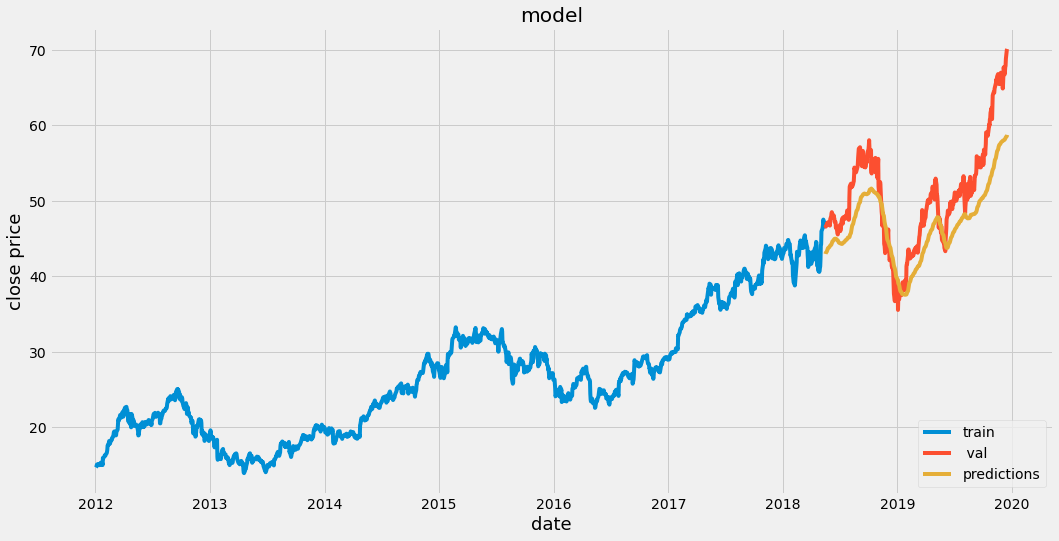

In [58]:
# plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['predictions'] = predictions

# visualize the data
plt.figure(figsize=(16,8))
plt.title('model')
plt.xlabel('date', fontsize=18)
plt.ylabel('close price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'predictions']])
plt.legend(['train', ' val', 'predictions'], loc='lower right')
plt.show()

In [59]:
# show valid and predicted price
valid

,Close,predictions
Date,,
2018-05-17,46.747501,42.960278
2018-05-18,46.577499,43.130577
2018-05-21,46.907501,43.272415
2018-05-22,46.790001,43.405655
2018-05-23,47.090000,43.523872
...,...,...
2019-12-11,67.692497,58.230572
2019-12-12,67.864998,58.322556
2019-12-13,68.787498,58.423088


In [61]:
# get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start = '2012-01-01', end='2019-12-17')

# create a new df
new_df = apple_quote.filter(['Close'])

# get the last 60 day closing price values and convert the df to an array
last_60_days = new_df[-60:].values

# scale the data to [0,1]

last_60_days_scaled = scaler.transform(last_60_days) # 这里不用fit_transform的原因是想和上面用同样的压缩效果！！！

# create an empty list
X_test = []

# Append the past 60 days
X_test.append(last_60_days_scaled)

# convert the X_test data to a numpy array
X_test = np.array(X_test)

# reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# get the predicted scaled price and inverse
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)

print(pred_price) 

[[58.91463]]


In [ ]:
### 这就是model认为的12-18号AAPL应给有的价格

In [62]:
apple_quote_1218 = web.DataReader('AAPL', data_source='yahoo', start = '2019-12-18', end='2019-12-18')
apple_quote_1218

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-18,70.474998,69.779999,69.949997,69.934998,116028400,69.23275
